# **Data Preprocessing Ground Level**

In [ ]:
#Importing the major libraries to be used for ground-level data processing
import numpy as np #for array creation and data manipulation
import csv #for CSV creation to store after converting from tensorflow
import pandas as pd #for database creation
import matplotlib.pyplot as plt #for creation of visuals
import seaborn as sns
import statistics

In [ ]:
#connecting to Drive and importing all data
from google.colab import drive
drive.mount('/content/drive')

df0 = pd.read_csv('/content/drive/MyDrive/0.csv')
df1 = pd.read_csv('/content/drive/MyDrive/1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/2.csv')
df3 = pd.read_csv('/content/drive/MyDrive/3.csv')
df4 = pd.read_csv('/content/drive/MyDrive/4.csv')
df5 = pd.read_csv('/content/drive/MyDrive/5.csv')
df6 = pd.read_csv('/content/drive/MyDrive/6.csv')
df7 = pd.read_csv('/content/drive/MyDrive/7.csv')
df8 = pd.read_csv('/content/drive/MyDrive/8.csv')
df9 = pd.read_csv('/content/drive/MyDrive/9.csv')
df10 = pd.read_csv('/content/drive/MyDrive/10.csv')
df11 = pd.read_csv('/content/drive/MyDrive/11.csv')
df12 = pd.read_csv('/content/drive/MyDrive/12.csv')
df13 = pd.read_csv('/content/drive/MyDrive/13.csv')
df14 = pd.read_csv('/content/drive/MyDrive/14.csv')
df15 = pd.read_csv('/content/drive/MyDrive/15.csv')
df16 = pd.read_csv('/content/drive/MyDrive/16.csv')
df17 = pd.read_csv('/content/drive/MyDrive/17.csv')
df18 = pd.read_csv('/content/drive/MyDrive/18.csv')
df19 = pd.read_csv('/content/drive/MyDrive/19.csv')
df20 = pd.read_csv('/content/drive/MyDrive/20.csv')
df21 = pd.read_csv('/content/drive/MyDrive/21.csv')
df22 = pd.read_csv('/content/drive/MyDrive/22.csv')
df23 = pd.read_csv('/content/drive/MyDrive/23.csv')
df24 = pd.read_csv('/content/drive/MyDrive/24.csv')

Mounted at /content/drive


In [ ]:
#use 2024 data as a model to investigate the parameters and columns of the dataset after importing
df24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58532 entries, 0 to 58531
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            58532 non-null  object 
 1   Source                          58532 non-null  object 
 2   Site ID                         58532 non-null  int64  
 3   POC                             58532 non-null  int64  
 4   Daily Mean PM2.5 Concentration  58532 non-null  float64
 5   Units                           58532 non-null  object 
 6   Daily AQI Value                 58532 non-null  int64  
 7   Local Site Name                 58171 non-null  object 
 8   Daily Obs Count                 58532 non-null  int64  
 9   Percent Complete                58532 non-null  float64
 10  AQS Parameter Code              58532 non-null  int64  
 11  AQS Parameter Description       58532 non-null  object 
 12  Method Code                     

In [ ]:
#use string manipulation for the "date" string to add year and month columns for each row, and verify the creation of these columns
for i in range(25):
    globals()[f'df{i}']['Year'] = 2000 + i

for i in range(25):
    globals()[f'df{i}']['Month'] = globals()[f'df{i}']['Date'].str[:2].astype(int)

df15.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude,Year,Month
0,01/01/2015,AQS,60010007,3,16.7,ug/m3 LC,65,Livermore,1,100.0,...,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217,2015,1
1,01/02/2015,AQS,60010007,3,23.1,ug/m3 LC,77,Livermore,1,100.0,...,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217,2015,1
2,01/03/2015,AQS,60010007,3,27.5,ug/m3 LC,85,Livermore,1,100.0,...,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217,2015,1
3,01/04/2015,AQS,60010007,3,28.2,ug/m3 LC,87,Livermore,1,100.0,...,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217,2015,1
4,01/05/2015,AQS,60010007,3,31.1,ug/m3 LC,92,Livermore,1,100.0,...,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217,2015,1


In [ ]:
#concatenate the datasets from 2000 to 2024 into one holistic dataset
df_list = [globals()[f'df{i}'] for i in range(25)]
df = pd.concat(df_list, ignore_index=True)
df

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,Method Code,Method Description,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/01/2000,AQS,60010007,1,13.9,ug/m3 LC,60,Livermore,1,100.0,...,120.0,Andersen RAAS2.5-300 PM2.5 SEQ w/WINS,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
1,01/16/2000,AQS,60010007,1,12.1,ug/m3 LC,57,Livermore,1,100.0,...,120.0,Andersen RAAS2.5-300 PM2.5 SEQ w/WINS,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
2,01/19/2000,AQS,60010007,1,8.7,ug/m3 LC,48,Livermore,1,100.0,...,120.0,Andersen RAAS2.5-300 PM2.5 SEQ w/WINS,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
3,01/22/2000,AQS,60010007,1,14.6,ug/m3 LC,61,Livermore,1,100.0,...,120.0,Andersen RAAS2.5-300 PM2.5 SEQ w/WINS,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
4,01/25/2000,AQS,60010007,1,6.3,ug/m3 LC,35,Livermore,1,100.0,...,120.0,Andersen RAAS2.5-300 PM2.5 SEQ w/WINS,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957574,12/27/2024,AQS,61131003,3,11.4,ug/m3 LC,55,Woodland-Gibson Road,1,100.0,...,170.0,Met One BAM-1020 Mass Monitor w/VSCC,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",6,California,113,Yolo,38.661210,-121.732690
957575,12/28/2024,AQS,61131003,3,8.8,ug/m3 LC,49,Woodland-Gibson Road,1,100.0,...,170.0,Met One BAM-1020 Mass Monitor w/VSCC,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",6,California,113,Yolo,38.661210,-121.732690
957576,12/29/2024,AQS,61131003,3,6.7,ug/m3 LC,37,Woodland-Gibson Road,1,100.0,...,170.0,Met One BAM-1020 Mass Monitor w/VSCC,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",6,California,113,Yolo,38.661210,-121.732690
957577,12/30/2024,AQS,61131003,3,7.4,ug/m3 LC,41,Woodland-Gibson Road,1,100.0,...,170.0,Met One BAM-1020 Mass Monitor w/VSCC,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",6,California,113,Yolo,38.661210,-121.732690


# **Annual Data Analysis Ground Level**

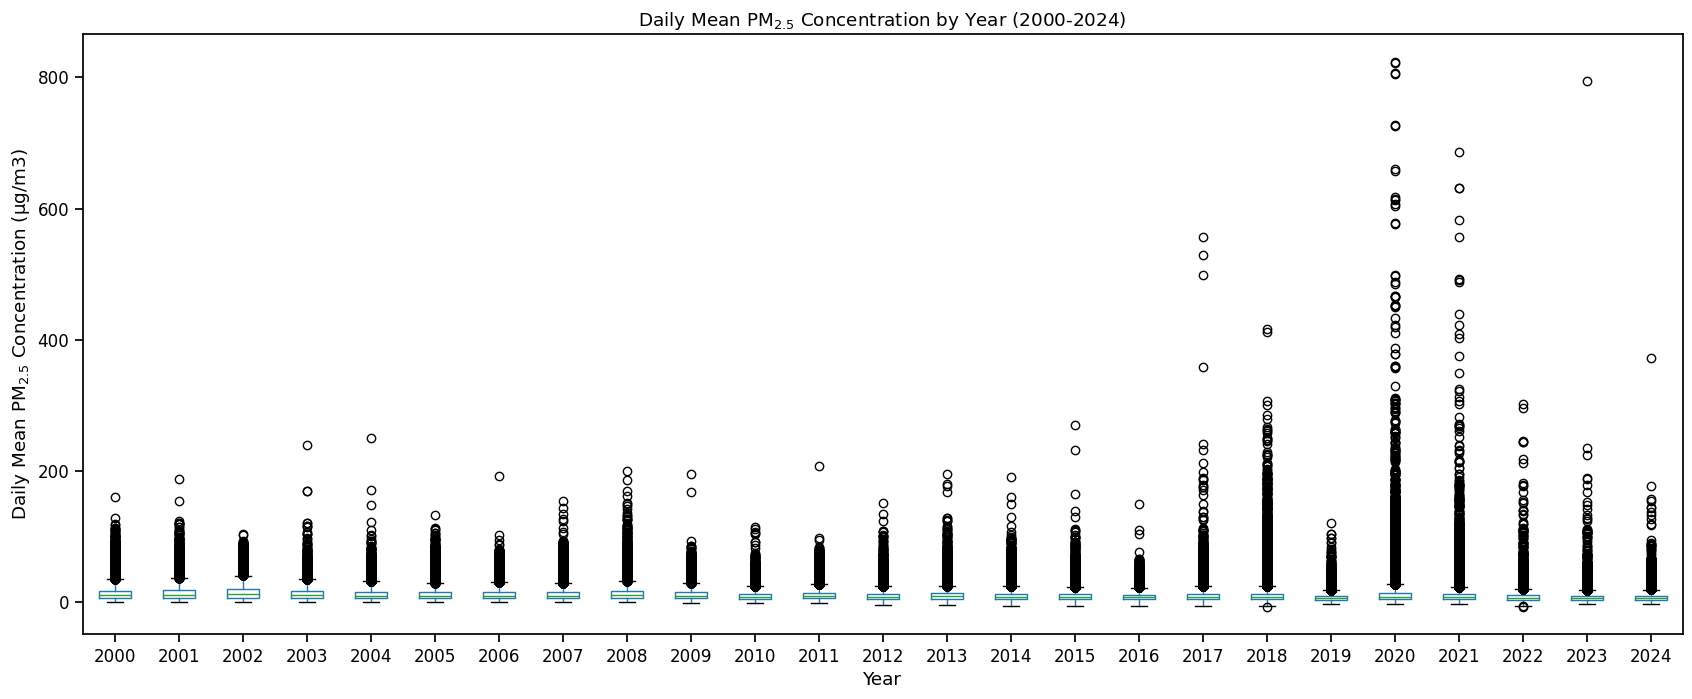

In [ ]:
#Annual Box and Whisker analysis to identify years with significant outliers that may demonstrate wildfires or other extreme events
sns.set_context("notebook", font_scale=1.1)
df.boxplot(
    column='Daily Mean PM2.5 Concentration',
    by='Year',
    grid=False,
    figsize = (20,8)
)

plt.title('Daily Mean PM$_{2.5}$ Concentration by Year (2000-2024)')
plt.suptitle('')
plt.xlabel('Year')
plt.ylabel('Daily Mean PM$_{2.5}$ Concentration (μg/m3)')

plt.show()

In [ ]:
#Identify the days from 2000 to 20204 with the highest PM2.5 levels for analysis as they relate to wildfires and outliers
df_sorted_desc = df.sort_values(by='Daily Mean PM2.5 Concentration', ascending=False)
df_sorted_desc.head(20)

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude,Year,Month
686433,09/17/2020,AQS,60510005,4,824.1,ug/m3 LC,1493,Lee Vining,1,100.0,...,NaN,NaN,6,California,51,Mono,37.962069,-119.120278,2020,9
686683,09/17/2020,AQS,60510005,24,822.4,ug/m3 LC,1490,Lee Vining,1,100.0,...,NaN,NaN,6,California,51,Mono,37.962069,-119.120278,2020,9
686430,09/14/2020,AQS,60510005,4,806.3,ug/m3 LC,1458,Lee Vining,1,100.0,...,NaN,NaN,6,California,51,Mono,37.962069,-119.120278,2020,9
686680,09/14/2020,AQS,60510005,24,804.7,ug/m3 LC,1455,Lee Vining,1,100.0,...,NaN,NaN,6,California,51,Mono,37.962069,-119.120278,2020,9
891217,11/02/2023,AQS,60893003,1,794.9,ug/m3 LC,1435,Lassen Volcanic NP,1,100.0,...,39820.0,"Redding, CA",6,California,89,Shasta,40.539990,-121.576460,2023,11
686432,09/16/2020,AQS,60510005,4,726.9,ug/m3 LC,1300,Lee Vining,1,100.0,...,NaN,NaN,6,California,51,Mono,37.962069,-119.120278,2020,9
686682,09/16/2020,AQS,60510005,24,725.2,ug/m3 LC,1296,Lee Vining,1,100.0,...,NaN,NaN,6,California,51,Mono,37.962069,-119.120278,2020,9
776362,08/07/2021,AQS,61050002,1,685.5,ug/m3 LC,1217,Weaverville-Courthouse,1,100.0,...,NaN,NaN,6,California,105,Trinity,40.734750,-122.941200,2021,8
685823,09/15/2020,AQS,60510001,6,659.6,ug/m3 LC,1166,Mammoth Lakes,1,100.0,...,NaN,NaN,6,California,51,Mono,37.645710,-118.966520,2020,9
686170,09/15/2020,AQS,60510001,26,657.7,ug/m3 LC,1162,Mammoth Lakes,1,100.0,...,NaN,NaN,6,California,51,Mono,37.645710,-118.966520,2020,9


In [ ]:
#find the days in 2018 with the highest PM2.5 concentrations
sorted18 = df18.sort_values(by='Daily Mean PM2.5 Concentration', ascending=False)
sorted18.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,Method Code,Method Description,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
2716,11/16/2018,AQS,60070008,3,417.0,ug/m3 LC,682,Chico-East Avenue,1,100.0,...,731,Met-One BAM-1020 W/PM2.5 SCC,17020.0,"Chico, CA",6,California,7,Butte,39.761680,-121.840470
2357,11/16/2018,AQS,60070008,1,411.7,ug/m3 LC,672,Chico-East Avenue,1,100.0,...,145,R & P Model 2025 PM-2.5 Sequential Air Sampler...,17020.0,"Chico, CA",6,California,7,Butte,39.761680,-121.840470
2715,11/15/2018,AQS,60070008,3,306.2,ug/m3 LC,462,Chico-East Avenue,1,100.0,...,731,Met-One BAM-1020 W/PM2.5 SCC,17020.0,"Chico, CA",6,California,7,Butte,39.761680,-121.840470
2356,11/15/2018,AQS,60070008,1,299.9,ug/m3 LC,449,Chico-East Avenue,1,100.0,...,145,R & P Model 2025 PM-2.5 Sequential Air Sampler...,17020.0,"Chico, CA",6,California,7,Butte,39.761680,-121.840470
48542,11/15/2018,AQS,61010003,3,285.0,ug/m3 LC,420,Yuba City,1,100.0,...,731,Met-One BAM-1020 W/PM2.5 SCC,49700.0,"Yuba City, CA",6,California,101,Sutter,39.138773,-121.618549


In [ ]:
#find the days in 2020 with the highest PM2.5 concentrations
sorted20 = df20.sort_values(by='Daily Mean PM2.5 Concentration', ascending=False)
sorted20.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,Method Code,Method Description,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
23497,09/17/2020,AQS,60510005,4,824.1,ug/m3 LC,1493,Lee Vining,1,100.0,...,238,Teledyne T640X at 16.67 LPM,NaN,NaN,6,California,51,Mono,37.962069,-119.120278
23747,09/17/2020,AQS,60510005,24,822.4,ug/m3 LC,1490,Lee Vining,1,100.0,...,738,Teledyne T640X at 16.67 LPM (Corrected),NaN,NaN,6,California,51,Mono,37.962069,-119.120278
23494,09/14/2020,AQS,60510005,4,806.3,ug/m3 LC,1458,Lee Vining,1,100.0,...,238,Teledyne T640X at 16.67 LPM,NaN,NaN,6,California,51,Mono,37.962069,-119.120278
23744,09/14/2020,AQS,60510005,24,804.7,ug/m3 LC,1455,Lee Vining,1,100.0,...,738,Teledyne T640X at 16.67 LPM (Corrected),NaN,NaN,6,California,51,Mono,37.962069,-119.120278
23496,09/16/2020,AQS,60510005,4,726.9,ug/m3 LC,1300,Lee Vining,1,100.0,...,238,Teledyne T640X at 16.67 LPM,NaN,NaN,6,California,51,Mono,37.962069,-119.120278


In [ ]:
#ANNUAL MEAN/MEDIAN CALCULATIONS
summary_df = df.groupby('Year')['Daily Mean PM2.5 Concentration'].agg(
    Mean_PM25_Per_Day='mean',
    Median_PM25_Per_Day='median'
).reset_index()

summary_df

,Year,Mean_PM25_Per_Day,Median_PM25_Per_Day
0,2000,14.729575,10.6
1,2001,14.962102,11.0
2,2002,16.115943,12.0
3,2003,13.716684,10.6
4,2004,13.123085,10.1
5,2005,12.473616,9.9
6,2006,12.405145,10.0
7,2007,12.971278,9.8
8,2008,13.562911,10.7
9,2009,11.889903,9.8


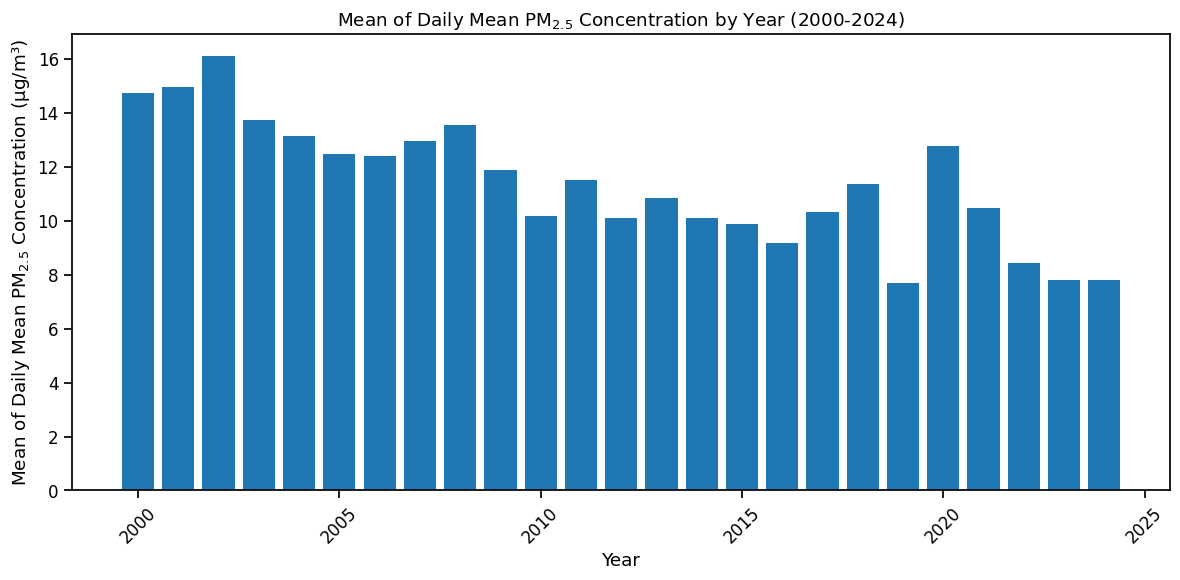

In [ ]:
#ANNUAL MEAN BAR CHART
plt.figure(figsize=(12, 6))  # Set figure size

plt.bar(summary_df['Year'], summary_df['Mean_PM25_Per_Day'])

plt.xlabel('Year')
plt.ylabel('Mean of Daily Mean PM$_{2.5}$ Concentration (μg/m³)')
plt.title('Mean of Daily Mean PM$_{2.5}$ Concentration by Year (2000-2024)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

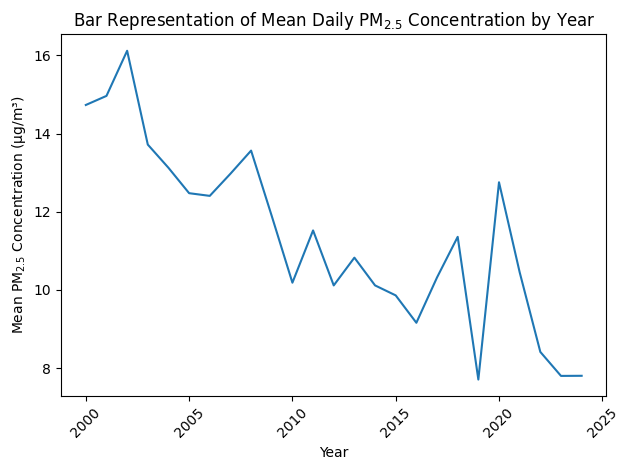

In [ ]:
#ANNUAL MEAN LINE GRAPH

plt.plot(summary_df['Year'], summary_df['Mean_PM25_Per_Day'])

plt.xlabel('Year')
plt.ylabel('Mean PM$_{2.5}$ Concentration (μg/m³)')
plt.title('Bar Representation of Mean Daily PM$_{2.5}$ Concentration by Year')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

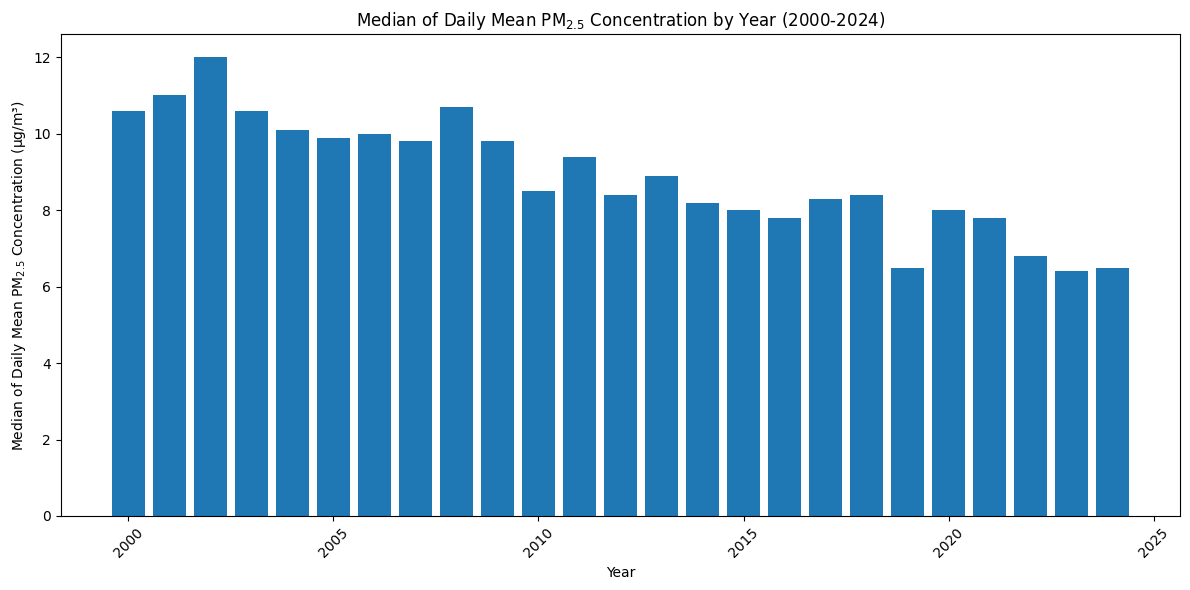

In [ ]:
#ANNUAL MEDIAN BAR CHART
plt.figure(figsize=(12, 6))  # Set figure size

plt.bar(summary_df['Year'], summary_df['Median_PM25_Per_Day'])

plt.xlabel('Year')
plt.ylabel('Median of Daily Mean PM$_{2.5}$ Concentration (μg/m³)')
plt.title('Median of Daily Mean PM$_{2.5}$ Concentration by Year (2000-2024)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

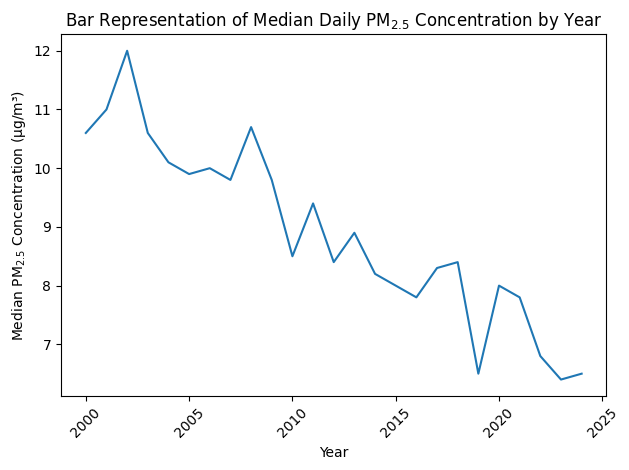

In [ ]:
#ANNUAL MEDIAN GRAPHS

plt.plot(summary_df['Year'], summary_df['Median_PM25_Per_Day'])

plt.xlabel('Year')
plt.ylabel('Median PM$_{2.5}$ Concentration (μg/m³)')
plt.title('Bar Representation of Median Daily PM$_{2.5}$ Concentration by Year')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
#medians in each month of 2020
df20['Month'] = df20['Date'].str[:2].astype(int)
monthly_medians = df20.groupby('Month')['Daily Mean PM2.5 Concentration'].median()
monthly_medians

,Daily Mean PM2.5 Concentration
Month,
1,7.7
2,8.2
3,4.1
4,5.0
5,5.6
6,6.3
7,7.9
8,10.9
9,18.8


In [ ]:
#means in each month of 2020
df20['Month'] = df20['Date'].str[:2].astype(int)
monthly_medians = df20.groupby('Month')['Daily Mean PM2.5 Concentration'].mean()
monthly_medians

,Daily Mean PM2.5 Concentration
Month,
1,9.736296
2,9.333861
3,4.930603
4,5.717426
5,6.624888
6,6.806691
7,8.881190
8,19.416536
9,35.369054


In [ ]:
#ground monitor minimum, maximum, mean statistical calculations
max_pm25 = df20['Daily Mean PM2.5 Concentration'].max()
validNums = []
for i in range(len(df20)):
  if df20['Daily Mean PM2.5 Concentration'][i] > 0:
    validNums.append(df20['Daily Mean PM2.5 Concentration'][i])
print ( "Minimum PM2.5 in 2020 " + str(min(validNums)))
print ( "Maximum PM2.5 in 2020 " + str(max_pm25))
print ( "Mean PM2.5 in 2020 " + str(statistics.mean(validNums)))

Minimum PM2.5 in 2020 0.1
Maximum PM2.5 in 2020 824.1
Mean PM2.5 in 2020 12.81809841680355


In [ ]:
#ground monitor percentile claculations
percentileG2020_25 = df20['Daily Mean PM2.5 Concentration'].quantile(0.25)
median2020 = df20['Daily Mean PM2.5 Concentration'].median()
percentileG2020_75 = df20['Daily Mean PM2.5 Concentration'].quantile(0.75)
print("25th Percentile for Ground Level " + str(percentileG2020_25))
print("Median for Ground Level " + str(median2020))
print("75th Percentile for Ground Level " + str(percentileG2020_75))

25th Percentile for Ground Level 4.6
Median for Ground Level 8.0
75th Percentile for Ground Level 13.6


# **Seasonal Analysis and Rural vs. Urban Ground Level**

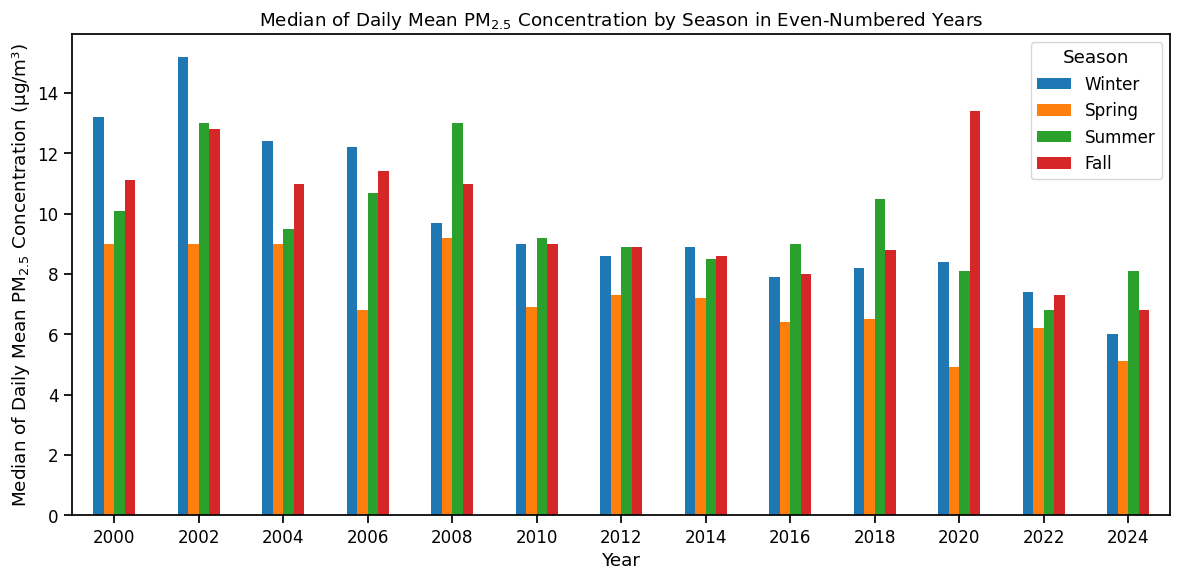

In [ ]:
#annual bar grouped bar graph comparing seasonal trends from 2000-2024
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].map(month_to_season)

season_filter = df[df['Year'].isin(years)]
grouped_data = season_filter.groupby(['Year', 'Season'])
median_pm25 = grouped_data['Daily Mean PM2.5 Concentration'].median()
grouped = median_pm25.unstack()

seasons = ['Winter', 'Spring', 'Summer', 'Fall']
grouped = grouped[seasons]

grouped.plot(kind='bar', figsize=(12, 6))

plt.title('Median of Daily Mean PM$_{2.5}$ Concentration by Season in Even-Numbered Years')
plt.xlabel('Year')
plt.ylabel('Median of Daily Mean PM$_{2.5}$ Concentration (μg/m³)')
plt.legend(title='Season')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

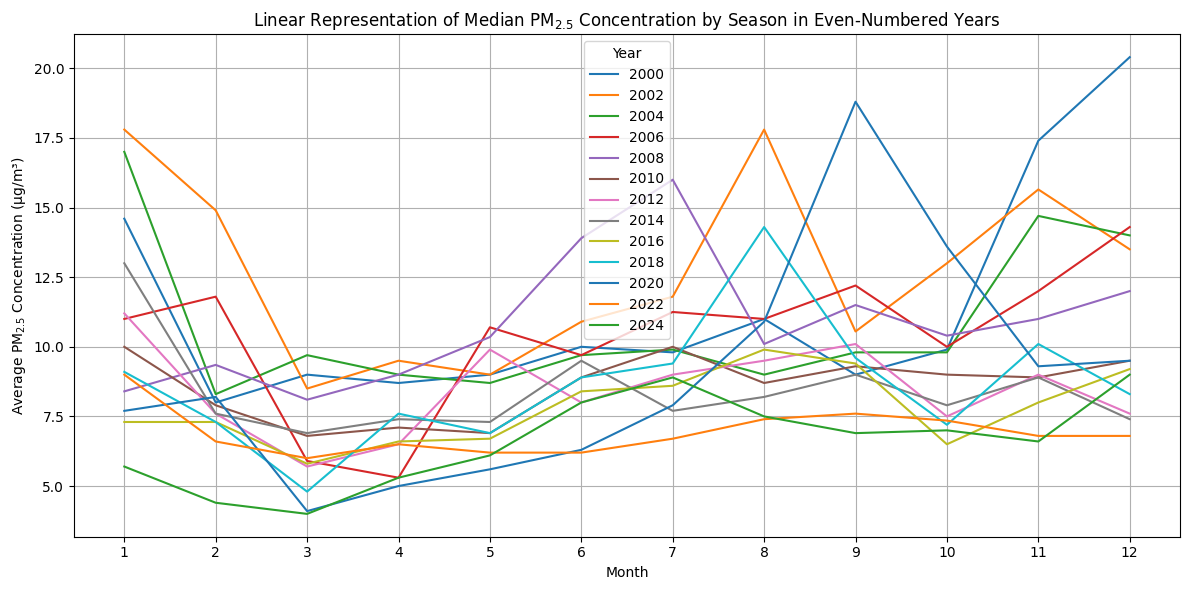

In [ ]:
#linear representation of seasonal trends
years = [2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022, 2024]

plt.figure(figsize=(12, 6))

for year in years:
    df_year = df[df['Year'] == year]

    monthly_avg = df_year.groupby('Month')['Daily Mean PM2.5 Concentration'].median()

    plt.plot(monthly_avg.index, monthly_avg.values, label=str(year))

plt.xlabel('Month')
plt.ylabel('Average PM$_{2.5}$ Concentration (μg/m³)')
plt.title('Linear Representation of Median PM$_{2.5}$ Concentration by Season in Even-Numbered Years')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#identify all the CBSA regions covered by the dataset to select certain regions for urban vs. rural analysis
df['CBSA Name'].unique()

array(['San Francisco-Oakland-Hayward, CA', 'Chico, CA', nan,
       'Crescent City, CA', 'Sacramento--Roseville--Arden-Arcade, CA',
       'Fresno, CA', 'Eureka-Arcata-Fortuna, CA', 'El Centro, CA',
       'Bishop, CA', 'Bakersfield, CA', 'Hanford-Corcoran, CA',
       'Clearlake, CA', 'Los Angeles-Long Beach-Anaheim, CA', 'Ukiah, CA',
       'Merced, CA', 'Salinas, CA', 'Truckee-Grass Valley, CA',
       'Riverside-San Bernardino-Ontario, CA',
       'San Jose-Sunnyvale-Santa Clara, CA', 'San Diego-Carlsbad, CA',
       'Stockton-Lodi, CA',
       'San Luis Obispo-Paso Robles-Arroyo Grande, CA',
       'Santa Maria-Santa Barbara, CA', 'Santa Cruz-Watsonville, CA',
       'Redding, CA', 'Vallejo-Fairfield, CA', 'Santa Rosa, CA',
       'Modesto, CA', 'Yuba City, CA', 'Visalia-Porterville, CA',
       'Oxnard-Thousand Oaks-Ventura, CA', 'Napa, CA', 'Madera, CA',
       'Red Bluff, CA'], dtype=object)

In [ ]:
#identifying the various local site names covered by the dataset to select certain regions for urban vs. rural analysis
df['Local Site Name'].unique()

array(['Livermore', 'Fremont - Chapel Way', 'Chico-Manzanita Ave.',
       'San Andreas-Gold Strike Road', 'Colusa-Sunrise Blvd', 'Concord',
       'Redwood NP', 'South Lake Tahoe-Sandy Way', 'Echo Summit',
       'Bliss SP', '3425 N FIRST ST, FRESNO', 'Clovis-Villa',
       'Fresno-Pacific', 'Kaiser', 'Eureka I Street',
       'Brawley-401 Main St.', 'Calexico-Ethel Street',
       'El Centro-9th Street', 'Death Valley NP - Park Village', 'Keeler',
       'Bakersfield-Golden / M St', 'Mojave', 'Bakersfield-California',
       'Ridgecrest-California Ave', 'Bakersfield-Airport (Planz)',
       'Taft-College', 'Lebec-Peace Valley Road', 'Corcoran-Patterson',
       'Lakeport-Lakeport Blvd.', 'Azusa', 'Burbank',
       'Los Angeles-North Main Street', 'Reseda', 'Lynwood', nan,
       'Pasadena', 'Long Beach (North)', 'Lancaster-Ponderosa St.',
       'Point Reyes National Seashore', 'Yosemite NP', 'Ukiah-Library',
       'Merced-M St', 'Alturas-Fourth St.', 'Mammoth Lakes', 'Salinas 3',
 

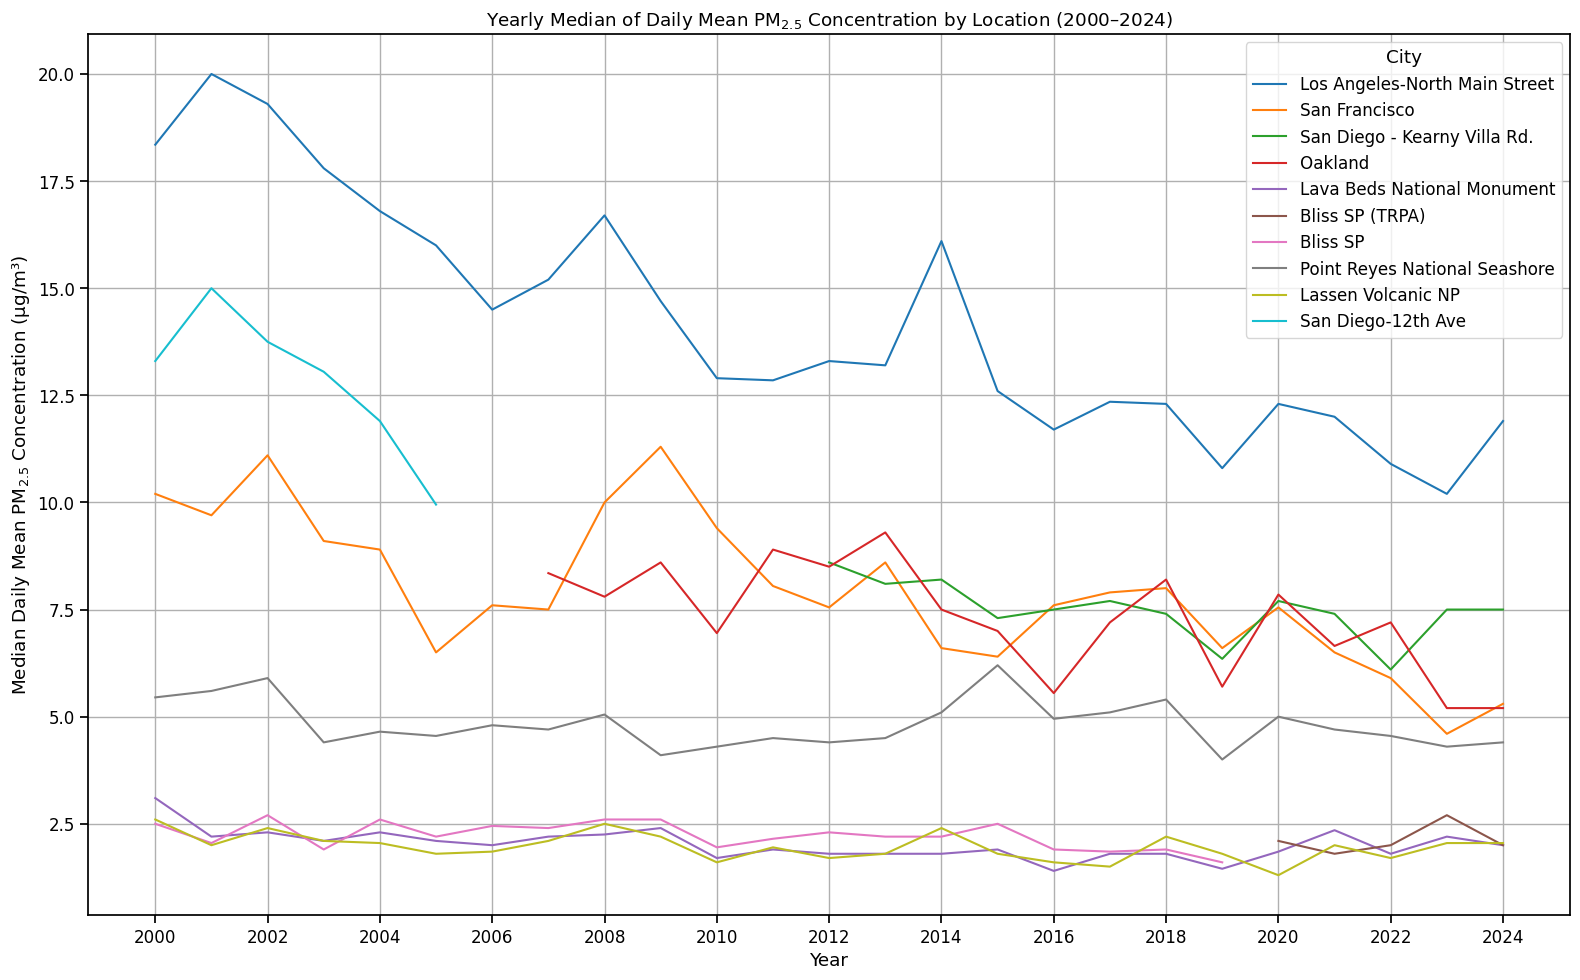

In [ ]:
#ANALYSIS OF MAJOR URBAN AREAS VS RURAL USING LOCAL MONITORS
cities = ['Los Angeles-North Main Street', 'San Francisco',
          'San Diego - Kearny Villa Rd.', 'Oakland', 'Lava Beds National Monument', 'Bliss SP (TRPA)',
          'Bliss SP', 'Point Reyes National Seashore', 'Lassen Volcanic NP',
          'San Diego-12th Ave']

urban_vs_rural = df[df['Local Site Name'].isin(cities)]

plt.figure(figsize=(16, 10))

for city in cities:
    city_df = urban_vs_rural[urban_vs_rural['Local Site Name'] == city]

    # Group by year and calculate median PM2.5
    yearly_median = city_df.groupby('Year')['Daily Mean PM2.5 Concentration'].median()

    # Plot the line (x = years, y = median)
    plt.plot(yearly_median.index, yearly_median.values, label=city)

plt.xlabel('Year')
plt.ylabel('Median Daily Mean PM$_{2.5}$ Concentration (μg/m³)')
plt.title('Yearly Median of Daily Mean PM$_{2.5}$ Concentration by Location (2000–2024)')
plt.xticks(range(2000, 2025, 2))
plt.legend(title='City')
plt.grid(True)
plt.tight_layout()
plt.show()

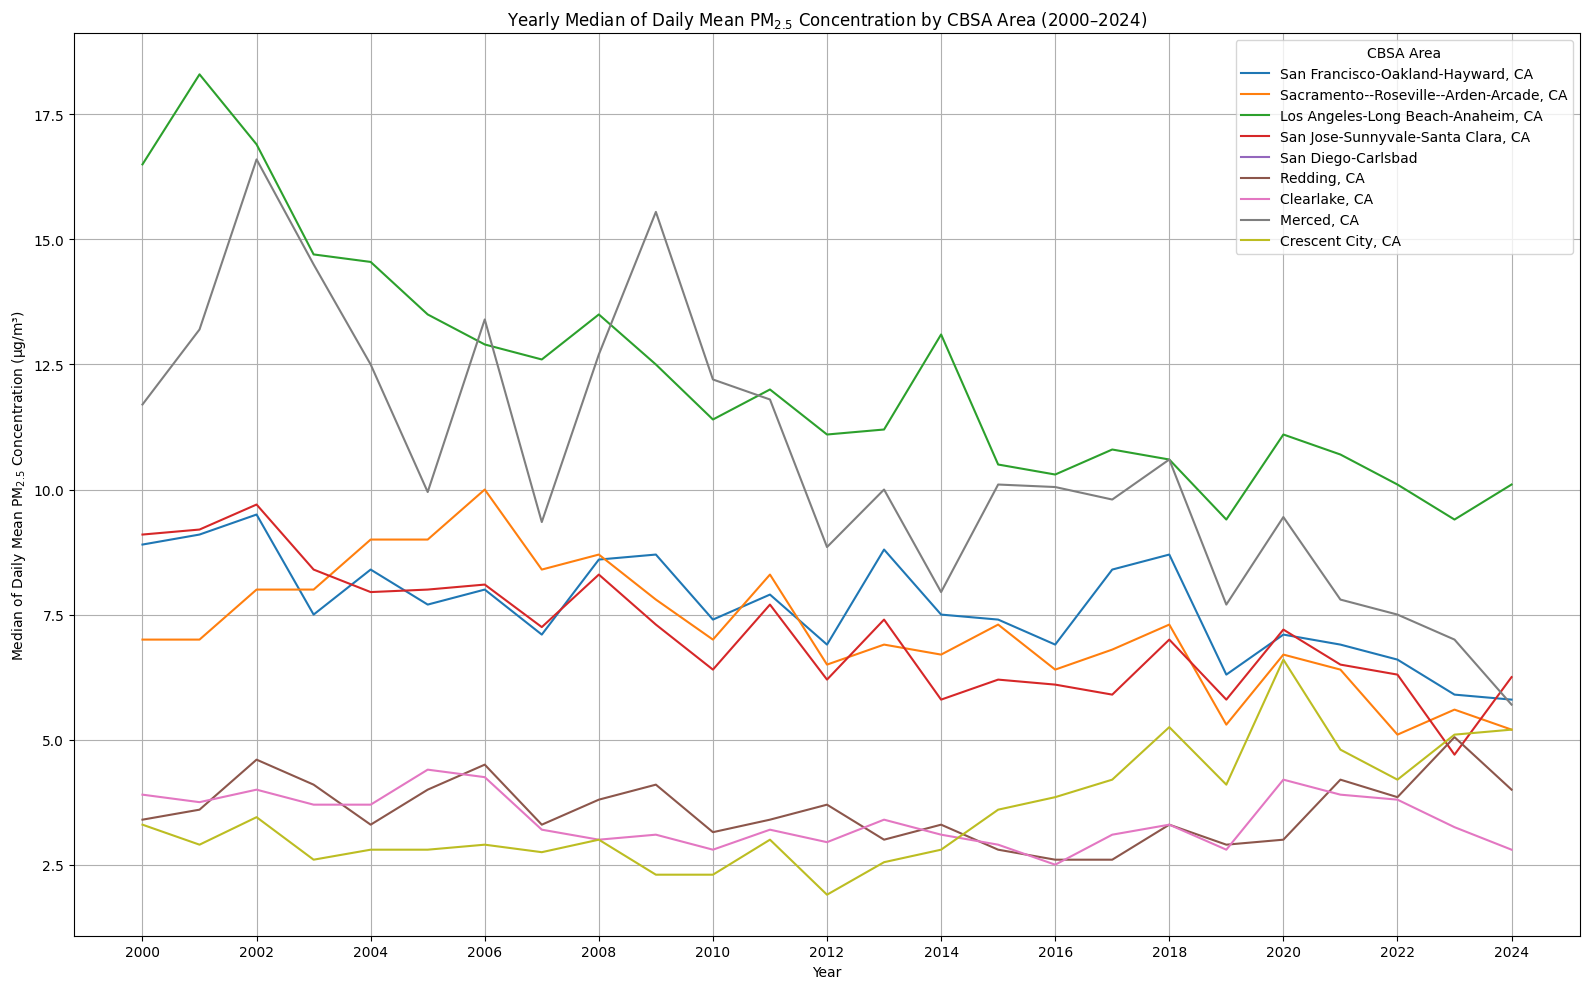

In [ ]:
#ANALYSIS OF MAJOR URBAN AREAS VS RURAL OR SUBURBAN USING CBSA REGIONS, WHICH PROVIDE MORE REASONABLE SPATIAL COVERAGE
cbsa_areas = ['San Francisco-Oakland-Hayward, CA',
              'Sacramento--Roseville--Arden-Arcade, CA',
              'Los Angeles-Long Beach-Anaheim, CA',
              'San Jose-Sunnyvale-Santa Clara, CA',
              'San Diego-Carlsbad', 'Redding, CA',
              'Clearlake, CA', 'Merced, CA',
              'Crescent City, CA']

cbsa_comp = df[df['CBSA Name'].isin(cbsa_areas)]

plt.figure(figsize=(16, 10))

for region in cbsa_areas:
    region_df = cbsa_comp[cbsa_comp['CBSA Name'] == region]

    yearly_median = region_df.groupby('Year')['Daily Mean PM2.5 Concentration'].median()

    plt.plot(yearly_median.index, yearly_median.values, label=region)

plt.xlabel('Year')
plt.ylabel('Median of Daily Mean PM$_{2.5}$ Concentration (μg/m³)')
plt.title('Yearly Median of Daily Mean PM$_{2.5}$ Concentration by CBSA Area (2000–2024)')
plt.xticks(range(2000, 2025, 2))
plt.legend(title='CBSA Area')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#table of monthly medians per cbsa reigon in 2020
cbsa_areas = ['San Francisco-Oakland-Hayward, CA',
              'Sacramento--Roseville--Arden-Arcade, CA',
              'Los Angeles-Long Beach-Anaheim, CA',
              'San Jose-Sunnyvale-Santa Clara, CA',
              'San Diego-Carlsbad', 'Redding, CA',
              'Clearlake, CA', 'Merced, CA',
              'Crescent City, CA']

cbsa_2020 = df20[df20['CBSA Name'].isin(cbsa_areas)]

cbsa_summary_2020 = cbsa_2020.groupby('CBSA Name')['Daily Mean PM2.5 Concentration'].agg(['mean', 'median', 'min', 'max']).reset_index()

cbsa_summary_2020.columns = ['CBSA Name', 'Mean Daily PM2.5 Concentration', 'Median Daily PM2.5 Concentration', "Min", "Max"]

# Display the table
display(cbsa_summary_2020)


,CBSA Name,Mean Daily PM2.5 Concentration,Median Daily PM2.5 Concentration,Min,Max
0,"Clearlake, CA",9.568852,4.20,1.1,111.5
1,"Crescent City, CA",9.060541,6.60,0.1,169.5
2,"Los Angeles-Long Beach-Anaheim, CA",13.143630,11.10,-0.5,175.0
3,"Merced, CA",15.051261,9.45,1.0,117.4
4,"Redding, CA",7.186224,3.00,0.1,84.5
5,"Sacramento--Roseville--Arden-Arcade, CA",12.285510,6.70,0.0,171.8
6,"San Francisco-Oakland-Hayward, CA",10.508918,7.10,-0.4,167.7
7,"San Jose-Sunnyvale-Santa Clara, CA",10.483701,7.20,0.4,123.1


 # **Maps Based on Ground-Level Data**

In [ ]:
#MAP OF GROUND-LEVEL DATA FOR 1/8/2024 TO VIEW SPATIAL DISTRIBUTION OF MONITORS
Daily_data = filtered_df = pd.concat([df[df['Date'] == '01/08/2024']])

import plotly.express as px

fig = px.scatter_mapbox(
    Daily_data,
    lat='Site Latitude',
    lon='Site Longitude',
    color='Daily Mean PM2.5 Concentration',
    size_max=15,
    zoom=5,
    mapbox_style='carto-positron',
    title='Daily Mean PM2.5 Concentration in μg/m3 by Location',
    color_continuous_scale='Viridis'
)

fig.show()

In [ ]:
#MAPPING THE ANNUAL MEAN PM2.5 BY CITY IN 2010
city_averages10 = df10.groupby('Local Site Name').agg({
    'Daily Mean PM2.5 Concentration': 'mean',
    'Site Latitude': 'first',
    'Site Longitude': 'first'
}).reset_index()

# Create the map
fig = px.scatter_mapbox(
    city_averages10,
    lat='Site Latitude',
    lon='Site Longitude',
    color='Daily Mean PM2.5 Concentration',
    size='Daily Mean PM2.5 Concentration',
    hover_name='Local Site Name',
    hover_data={'Daily Mean PM2.5 Concentration': ':.2f'},
    size_max=20,
    zoom=5,
    mapbox_style='carto-positron',
    title='Average PM2.5 Concentration by City in 2010',
    color_continuous_scale='RdYlBu_r',
    color_continuous_midpoint= 20,
    labels={'Daily Mean PM2.5 Concentration': 'Avg PM2.5 (μg/m³)'}
)

fig.update_layout(
    mapbox_center={"lat": 37.0, "lon": -119.5},
    width=800,
    height=600,
    coloraxis_colorbar=dict(
        title='Avg PM2.5 (μg/m³)',
        thicknessmode='pixels',
        thickness=20,
        lenmode='pixels',
        len=300
    )

)

In [ ]:
#MAPPING THE ANNUAL MEAN PM2.5 BY CITY IN 2020
city_averages20 = df20.groupby('Local Site Name').agg({
    'Daily Mean PM2.5 Concentration': 'mean',
    'Site Latitude': 'first',
    'Site Longitude': 'first'
}).reset_index()

# Create the map
fig = px.scatter_mapbox(
    city_averages20,
    lat='Site Latitude',
    lon='Site Longitude',
    color='Daily Mean PM2.5 Concentration',
    size='Daily Mean PM2.5 Concentration',
    hover_name='Local Site Name',
    hover_data={'Daily Mean PM2.5 Concentration': ':.2f'},
    size_max=20,
    zoom=5,
    mapbox_style='carto-positron',
    title='Average PM2.5 Concentration by City in 2020',
    color_continuous_scale='RdYlBu_r',
    color_continuous_midpoint= 25,
    labels={'Daily Mean PM2.5 Concentration': 'Avg PM2.5 (μg/m³)'}
)

fig.update_layout(
    mapbox_center={"lat": 37.0, "lon": -119.5},
    width=800,
    height=600,
    coloraxis_colorbar=dict(
        title='Avg PM2.5 (μg/m³)',
        thicknessmode='pixels',
        thickness=20,
        lenmode='pixels',
        len=300
    )

)

In [ ]:
#MAPPING THE ANNUAL MEDIAN PM2.5 BY CITY FROM 2000-2024 AS SUBPLOT
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

color_min = 0
color_max = 15
fig_median = make_subplots(
    rows=5, cols=5,
    subplot_titles=[f'Year {2000+i} (Median)' for i in range(25)],
    specs=[[{"type": "mapbox"} for _ in range(5)] for _ in range(5)],
    vertical_spacing=0.05,
    horizontal_spacing=0.05
)

for i in range(25):
    year = 2000 + i
    row = i // 5 + 1
    col = i % 5 + 1

    df_year = globals()[f'df{i}']

    city_medians = df_year.groupby('Local Site Name').agg({
        'Daily Mean PM2.5 Concentration': 'median',
        'Site Latitude': 'first',
        'Site Longitude': 'first'
    }).reset_index()

    fig_median.add_trace(
        go.Scattermapbox(
            lat=city_medians['Site Latitude'],
            lon=city_medians['Site Longitude'],
            mode='markers',
            marker=dict(
                size=city_medians['Daily Mean PM2.5 Concentration'].clip(5, 20),
                color=city_medians['Daily Mean PM2.5 Concentration'],
                colorscale='RdYlBu_r',
                cmin=color_min,
                cmax=color_max,
                showscale=True if i == 24 else False,
                colorbar=dict(
                    title='PM2.5 (μg/m³)',
                    x=1.02,
                    len=0.8
                ) if i == 24 else None
            ),
            text=city_medians['Local Site Name'],
            hovertemplate='<b>%{text}</b><br>' +
                         'PM2.5: %{marker.color:.2f} μg/m³<br>' +
                         '<extra></extra>',
            showlegend=False
        ),
        row=row, col=col
    )

for i in range(1, 26):
    row = (i-1) // 5 + 1
    col = (i-1) % 5 + 1

    fig_median.update_layout(**{
        f'mapbox{i}': dict(
            style='carto-positron',
            center=dict(lat=37.0, lon=-119.5),
            zoom=3.5
        )
    })

fig_median.update_layout(
    title_text="PM2.5 Concentration by Location and Year - Median Values (2000-2024)",
    title_x=0.5,
    height=1200,
    width=1400,
    showlegend=False,
    margin=dict(l=20, r=60, t=80, b=20)
)

fig_median.show()


# **Satellite Data Preprocessing**

In [ ]:
!pip install cartopy
!pip install rasterio
!pip install affine

In [ ]:
import xarray as xr
import cartopy
import cartopy.crs as ccrs
from datetime import timedelta, date
from dateutil.relativedelta import relativedelta
import glob
import seaborn as sns
import geopandas as gpd
from rasterio import features
from affine import Affine
import dask
from dask.distributed import Client
import cartopy.feature as cfeature
import datetime
from shapely.geometry import Point
from tqdm import tqdm

In [ ]:
data_0917 = xr.open_dataset(f'/content/drive/MyDrive/2020/USHAP_PM2.5_D1K_20200917_V1.nc')

In [ ]:
print("Dimensions:", data_0917.dims)

print("Coordinates:", list(data_0917.coords))

print("Latitude range:", data_0917['lat'].values.min(), "to", data_0917['lat'].values.max())
print("Longitude range:", data_0917['lon'].values.min(), "to", data_0917['lon'].values.max())

print("Data Variables:", list(data_0917.data_vars))

pm25 = data_0917['PM2.5']
print("PM2.5 shape:", pm25.shape)

Dimensions: FrozenMappingWarningOnValuesAccess({'lat': 2600, 'lon': 6000})
Coordinates: ['lat', 'lon']
Latitude range: 24.005 to 49.995
Longitude range: -125.995 to -66.005
Data Variables: ['PM2.5']
PM2.5 shape: (2600, 6000)


In [ ]:
# Adjust the bounding box to cover California
us_lat_min = 31.0
us_lat_max = 43.0
us_lon_min = -125.0
us_lon_max = -113.0

extent = [us_lon_min, us_lon_max, us_lat_min, us_lat_max]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

# **Satellite Data Mapping**

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


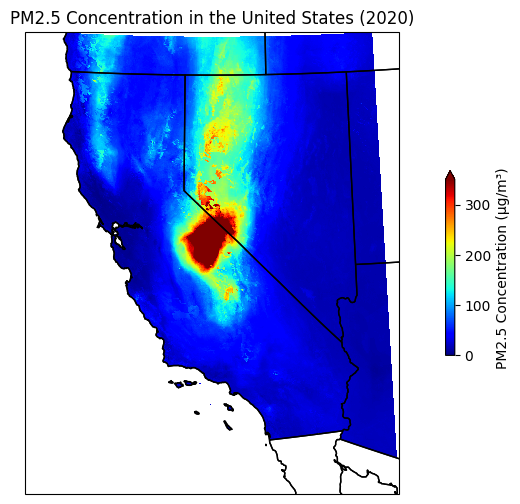

In [ ]:
#ONE DAY MAP SATELLITE FOR 09/17/2020 TO VIEW DATA SPREAD
sat_data_set = data_0917.sel(lat = slice(us_lat_max, us_lat_min), lon = slice(us_lon_min, us_lon_max))

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

sat_data_set['PM2.5'].plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='jet',
    vmin=0,
    vmax=350,
    cbar_kwargs={'shrink': 0.4, 'label': 'PM2.5 Concentration (µg/m³)'}
)

ax.add_feature(cartopy.feature.STATES, edgecolor='black')
ax.coastlines()
plt.title('PM2.5 Concentration in the United States (2020)')
plt.show() #TITLE

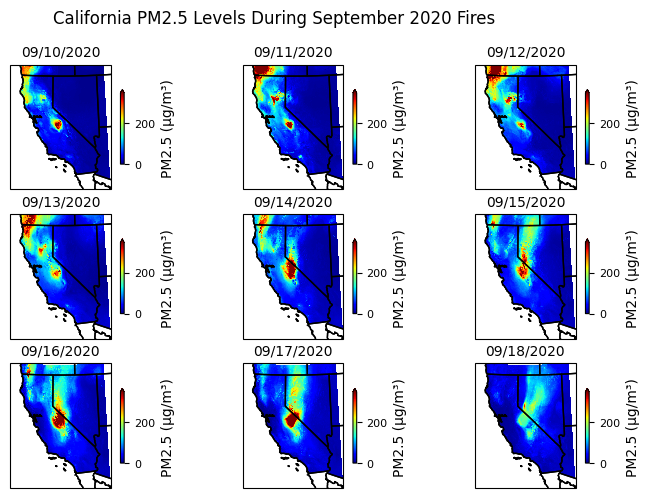

In [ ]:
#MAPPING WILDFIRE SPREAD DURING SEPTMEBER 2020 FIRES
fdate_strings = [f'202009{day:02d}' for day in range(10, 19)]

fig, axes = plt.subplots(3, 3, figsize=(8.5, 5.5), subplot_kw={'projection': ccrs.AlbersEqualArea(central_lon, central_lat)})
axes = axes.flatten()

for i, date_str in enumerate(date_strings):
    filename = f'/content/drive/MyDrive/2020/USHAP_PM2.5_D1K_{date_str}_V1.nc'

    try:
        ds = xr.open_dataset(filename)
        pm25_subset = ds.sel(lat=slice(us_lat_max, us_lat_min), lon=slice(us_lon_min, us_lon_max))

        ax = axes[i]
        ax.set_extent(extent)

        pm25_plot = pm25_subset['PM2.5'].plot(
            ax=ax,
            transform=ccrs.PlateCarree(),
            cmap='jet',
            vmin=0,
            vmax=350,
            add_colorbar=True,
            cbar_kwargs={
                'shrink': 0.6,
                'label': 'PM2.5 (µg/m³)'
            }
        )

        #  Set colorbar label font size
        pm25_plot.colorbar.ax.set_ylabel('PM2.5 (µg/m³)', fontsize=10)
        #  Set tick font size (optional)
        pm25_plot.colorbar.ax.tick_params(labelsize=8)

        ax.set_title(f"{date_str[4:6]}/{date_str[6:8]}/2020", fontsize=10)
        ax.add_feature(cfeature.STATES, edgecolor='black')
        ax.coastlines()

    except FileNotFoundError:
        ax = axes[i]
        ax.set_title(f"{date_str} missing", fontsize=10)
        ax.axis('off')

for j in range(len(date_strings), len(axes)):
    axes[j].axis('off')

fig.suptitle('California PM2.5 Levels During September 2020 Fires')
plt.show()

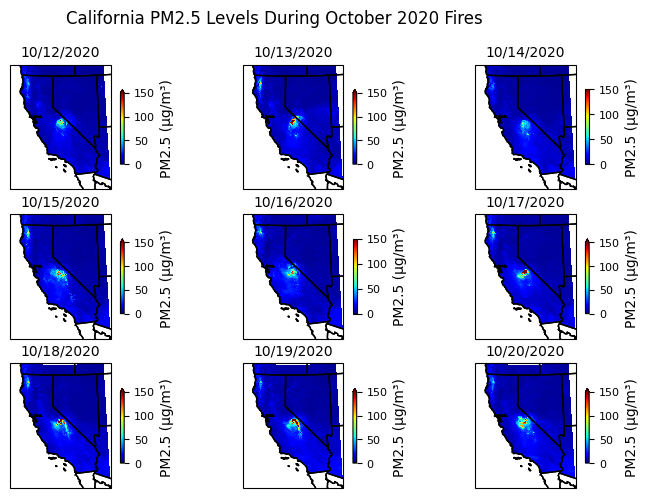

In [ ]:
#MAPPING WILDFIRE SPREAD DURING OCTOBER 2020 FIRES
date_strings = [f'202010{day:02d}' for day in range(12, 21)]

fig, axes = plt.subplots(3, 3, figsize=(8.5, 5.5), subplot_kw={'projection': ccrs.AlbersEqualArea(central_lon, central_lat)})
axes = axes.flatten()

for i, date_str in enumerate(date_strings):
    filename = f'/content/drive/MyDrive/2020/USHAP_PM2.5_D1K_{date_str}_V1.nc'

    try:
        ds = xr.open_dataset(filename)
        pm25_subset = ds.sel(lat=slice(us_lat_max, us_lat_min), lon=slice(us_lon_min, us_lon_max))

        ax = axes[i]
        ax.set_extent(extent)

        pm25_plot = pm25_subset['PM2.5'].plot(
            ax=ax,
            transform=ccrs.PlateCarree(),
            cmap='jet',
            vmin=0,
            vmax=150,
            add_colorbar=True,
            cbar_kwargs={
                'shrink': 0.6,
                'label': 'PM2.5 (µg/m³)'
            }
        )

        # Match colorbar formatting
        pm25_plot.colorbar.ax.set_ylabel('PM2.5 (µg/m³)', fontsize=10)
        pm25_plot.colorbar.ax.tick_params(labelsize=8)

        ax.set_title(f"{date_str[4:6]}/{date_str[6:8]}/2020", fontsize=10)
        ax.add_feature(cfeature.STATES, edgecolor='black')
        ax.coastlines()

    except FileNotFoundError:
        ax = axes[i]
        ax.set_title(f"{date_str} missing", fontsize=10)
        ax.axis('off')

for j in range(len(date_strings), len(axes)):
    axes[j].axis('off')

fig.suptitle('California PM2.5 Levels During October 2020 Fires')
plt.show()

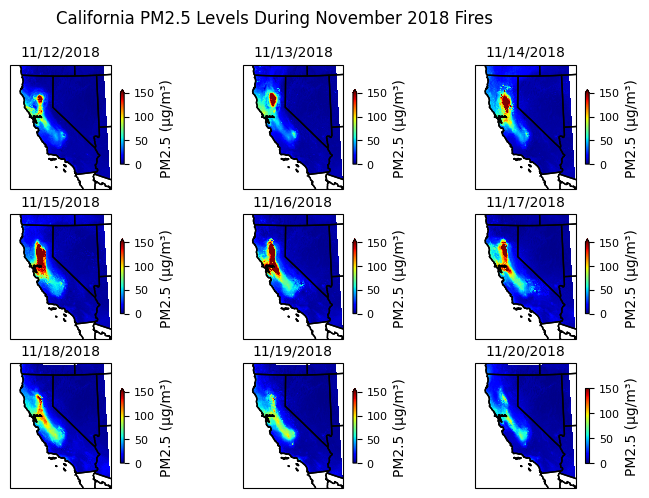

In [ ]:
#MAPPING WILDFIRE SPREAD DURING NOVEMBER 2018 FIRES
date_strings = [f'201811{day:02d}' for day in range(12, 21)]

fig, axes = plt.subplots(3, 3, figsize=(8.5, 5.5), subplot_kw={'projection': ccrs.AlbersEqualArea(central_lon, central_lat)})
axes = axes.flatten()

for i, date_str in enumerate(date_strings):
    filename = f'/content/drive/MyDrive/2018/USHAP_PM2.5_D1K_{date_str}_V1.nc'

    try:
        ds = xr.open_dataset(filename)
        pm25_subset = ds.sel(lat=slice(us_lat_max, us_lat_min), lon=slice(us_lon_min, us_lon_max))

        ax = axes[i]
        ax.set_extent(extent)

        pm25_plot = pm25_subset['PM2.5'].plot(
            ax=ax,
            transform=ccrs.PlateCarree(),
            cmap='jet',
            vmin=0,
            vmax=150,
            add_colorbar=True,
            cbar_kwargs={
                'shrink': 0.6,
                'label': 'PM2.5 (µg/m³)'
            }
        )

        # Standardized colorbar font size
        pm25_plot.colorbar.ax.set_ylabel('PM2.5 (µg/m³)', fontsize=10)
        pm25_plot.colorbar.ax.tick_params(labelsize=8)

        ax.set_title(f"{date_str[4:6]}/{date_str[6:8]}/2018", fontsize=10)
        ax.add_feature(cfeature.STATES, edgecolor='black')
        ax.coastlines()

    except FileNotFoundError:
        ax = axes[i]
        ax.set_title(f"{date_str} missing", fontsize=10)
        ax.axis('off')

# Hide unused axes
for j in range(len(date_strings), len(axes)):
    axes[j].axis('off')

# Title for the whole figure
fig.suptitle('California PM2.5 Levels During November 2018 Fires')
plt.show()

/tmp/ipython-input-18-3298560956.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.9])  # Adjust layout to make space for title


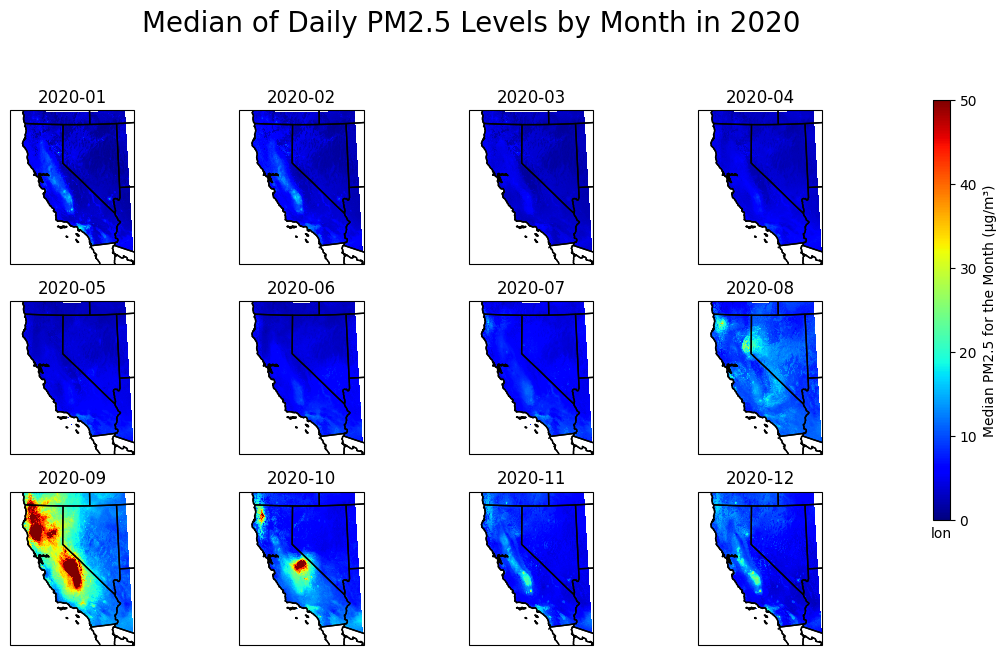

In [ ]:
#MAPPING MONTHLY MEDIANS FOR 2020 USING COMPREHENSIVE DATA
fig, axes = plt.subplots(3, 4, figsize=(11, 7), subplot_kw={'projection': ccrs.AlbersEqualArea(central_lon, central_lat)})
axes = axes.flatten()

for month in range(1, 13):
    month_str = f"{month:02d}"
    files = sorted(glob.glob(f"/content/drive/MyDrive/2020/USHAP_PM2.5_D1K_2020{month_str}*_V1.nc"))

    datasets = []
    for file in files:
        ds = xr.open_dataset(file)
        subset = ds.sel(lat=slice(us_lat_max, us_lat_min), lon=slice(us_lon_min, us_lon_max))
        datasets.append(subset['PM2.5'])

    ax = axes[month - 1]
    ax.set_extent(extent)

    if datasets:
        combined = xr.concat(datasets, dim='time')
        median_pm25 = combined.median(dim='time')

        median_pm25.plot(
            ax=ax,
            transform=ccrs.PlateCarree(),
            cmap='jet',
            vmin=0,
            vmax=50,
            add_colorbar=False
        )
        ax.set_title(f"2020-{month_str}")
    else:
        ax.set_title(f"2020-{month_str} (no data)")
        ax.axis('off')

    ax.add_feature(cfeature.STATES, edgecolor='black')
    ax.coastlines()

# Shared colorbar
cbar_ax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
dummy = median_pm25.plot(cmap='jet', vmin=0, vmax=50, add_colorbar=False)
fig.colorbar(dummy, cax=cbar_ax, label='Median PM2.5 for the Month (µg/m³)')

fig.suptitle('Median of Daily PM2.5 Levels by Month in 2020', fontsize=20, y=0.93)

plt.tight_layout(rect=[0, 0, 0.9, 0.9])
plt.show()

/tmp/ipython-input-38-194843808.py:50: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



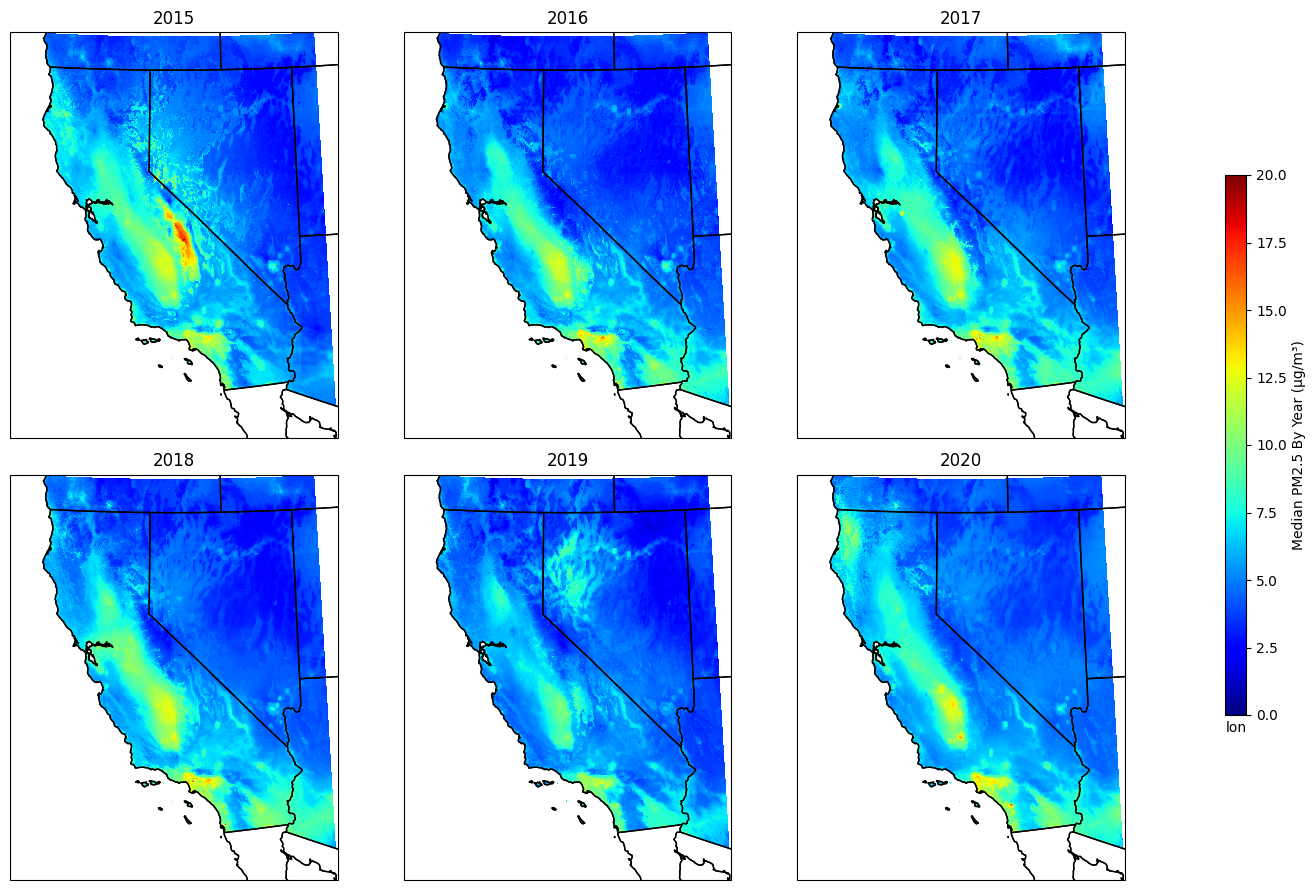

In [ ]:
#MAPPING ANNUAL MEDIANS FROM 2015-2020 USING COMPREHENSIVE DATA
years = [2015, 2016, 2017, 2018, 2019, 2020]
rows, cols = 2, 3

fig, axes = plt.subplots(rows, cols, figsize=(14, 9),
                         subplot_kw={'projection': ccrs.AlbersEqualArea(central_lon, central_lat)})

axes = axes.flatten()

for i, year in enumerate(years):
    files = sorted(glob.glob(f"/content/drive/MyDrive/{year}/USHAP_PM2.5_D1K_{year}[0-9][0-9][0-9][0-9]_V1.nc"))
    datasets = []

    for file in files:
      with xr.open_dataset(file) as ds:
          subset = ds.sel(lat=slice(us_lat_max, us_lat_min), lon=slice(us_lon_min, us_lon_max))
          datasets.append(subset['PM2.5'])

    ax = axes[i]
    ax.set_extent(extent)

    if datasets:
        combined = xr.concat(datasets, dim='time')
        median_pm25 = combined.median(dim='time')

        median_pm25.plot(
            ax=ax,
            transform=ccrs.PlateCarree(),
            cmap='jet',
            vmin=0,
            vmax=20,
            add_colorbar=False
        )
        ax.set_title(f"{year}")
    else:
        ax.set_title(f"{year} (no data)")
        ax.axis('off')

    ax.add_feature(cfeature.STATES, edgecolor='black')
    ax.coastlines()

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

cbar_ax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
if 'median_pm25' in locals():
    dummy = median_pm25.plot(cmap='jet', vmin=0, vmax=20, add_colorbar=False)
    fig.colorbar(dummy, cax=cbar_ax, label='Median PM2.5 By Year (µg/m³)')

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

In [ ]:
#MAPPING SEASONAL MEDIANS FOR 2020 USING COMPREHENSIVE DATA
seasons = {
    "Winter (Dec-Feb)": ["01", "02", "12"],
    "Spring (Mar-May)": ["04", "05", "03"],
    "Summer (Jun-Aug)": ["07", "08", "06"],
    "Fall (Sep-Nov)": ["10", "11", "09"]
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10), subplot_kw={'projection': ccrs.AlbersEqualArea(central_lon, central_lat)})
axes = axes.flatten()

for i, (season_name, months) in enumerate(seasons.items()):
    files = []
    for month in months:
        monthly_files = sorted(glob.glob(f"/content/drive/MyDrive/2020/USHAP_PM2.5_D1K_2020{month}*_V1.nc"))
        files.extend(monthly_files)

    datasets = []
    for file in files:
        ds = xr.open_dataset(file)
        subset = ds.sel(lat=slice(us_lat_max, us_lat_min), lon=slice(us_lon_min, us_lon_max))
        datasets.append(subset['PM2.5'])

    ax = axes[i]
    ax.set_extent(extent)

    if datasets:
        combined = xr.concat(datasets, dim='time')
        median_pm25 = combined.median(dim='time')

        median_pm25.plot(
            ax=ax,
            transform=ccrs.PlateCarree(),
            cmap='jet',
            vmin=0,
            vmax=50,
            add_colorbar=False
        )
        ax.set_title(season_name)
    else:
        ax.set_title(f"{season_name} (no data)")
        ax.axis('off')

    ax.add_feature(cfeature.STATES, edgecolor='black')
    ax.coastlines()

# Shared colorbar
cbar_ax = fig.add_axes([0.92, 0.25, 0.015, 0.5])
dummy = median_pm25.plot(cmap='jet', vmin=0, vmax=50, add_colorbar=False)
fig.colorbar(dummy, cax=cbar_ax, label='Median PM2.5 in 2020 By Season (µg/m³)')

fig.suptitle('Median of Daily PM2.5 Levels by Season in 2020', fontsize=20)


plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

In [ ]:
#CALCULATING MINIMUM AND MAXIMUM VALUES FOR 2020 FOR DATA COMPARISON
data_2020_files = sorted(glob.glob(f"/content/drive/MyDrive/2020/USHAP_PM2.5_D1K_2020*_V1.nc"))

if data_2020_files:

    with xr.open_dataset(data_2020_files[0]) as ds:
        #setting firts value in dataset as min and max
        min_pm25 = ds['PM2.5'].min().values
        max_pm25 = ds['PM2.5'].max().values
    #looping through available data and reassigning min and max
    for file in data_2020_files[1:]:
        with xr.open_dataset(file) as ds:
            current_min = ds['PM2.5'].min().values
            current_max = ds['PM2.5'].max().values
            min_pm25 = min(min_pm25, current_min)
            max_pm25 = max(max_pm25, current_max)

    print(f"Minimum PM2.5 concentration in 2020: {min_pm25}")
    print(f"Maximum PM2.5 concentration in 2020: {max_pm25}")
else:
    print("error")

Minimum PM2.5 concentration in 2020: 0.10000000149011612
Maximum PM2.5 concentration in 2020: 824.1000366210938


In [ ]:
#CALCULATING MEAN VALUES FOR 2020 FOR DATA COMPARISON
data_2020_files = sorted(glob.glob(f"/content/drive/MyDrive/2020/USHAP_PM2.5_D1K_2020*_V1.nc"))
actualMeanValues = []
if data_2020_files:
    for file in data_2020_files:

        with xr.open_dataset(file) as ds:
            current_mean = ds['PM2.5'].mean().values
            if(current_mean > 0):
                actualMeanValues.append(current_mean)

    mean_pm25 = np.mean(actualMeanValues)
    print(f"Mean PM2.5 concentration in 2020: {mean_pm25}")
else:
    print("error")

Mean PM2.5 concentration in 2020: 6.798797996317754


In [ ]:
#CALCULATING SUMMARY STATISTICS BY MONTH FOR 2020 FOR DATA COMPARISON
monthly_stats = []
for month in range(1, 13):
    month_str = f"{month:02d}"
    files = sorted(glob.glob(f"/content/drive/MyDrive/2020/USHAP_PM2.5_D1K_2020{month_str}*_V1.nc"))

    month_dataarrays = []
    for file in files:
        with xr.open_dataset(file) as ds:
            california_ds = ds.sel(
                lat=slice(us_lat_max, us_lat_min),
                lon=slice(us_lon_min, us_lon_max)
            )
            month_dataarrays.append(california_ds['PM2.5'])
    #store summary statistics in a list
    if month_dataarrays:
        combined = xr.concat(month_dataarrays, dim='time')
        monthly_stats.append({
            'Month': month,
            'Mean': float(combined.mean().values),
            'Median': float(combined.median().values),
            'Min': float(combined.min().values),
            'Max': float(combined.max().values),
            '25th Percentile': float(combined.quantile(0.25).values),
            '75th Percentile': float(combined.quantile(0.75).values)
        })

monthly_summary = pd.DataFrame(monthly_stats)
monthly_summary['Month'] = monthly_summary['Month'].map(lambda x: datetime.datetime(2020, x, 1).strftime('%B'))
#displays list in a table
display(monthly_summary.style
        .format({'Mean': '{:.1f}', 'Median': '{:.1f}', 'Min': '{:.1f}',
                 'Max': '{:.1f}', '25th Percentile': '{:.1f}', '75th Percentile': '{:.1f}'})
        .set_caption('Monthly PM2.5 Statistics for California (2020) - Satellite Data')
        .set_properties(**{'text-align': 'center'}))

,Month,Mean,Median,Min,Max,25th Percentile,75th Percentile
0,January,3.6,3.2,0.1,66.1,2.1,4.9
1,February,4.2,3.7,0.1,86.1,2.5,5.5
2,March,2.9,3.0,0.1,79.3,2.3,4.0
3,April,3.8,3.6,0.1,39.8,2.8,4.6
4,May,4.2,4.0,0.1,52.3,3.0,5.3
5,June,4.7,4.5,0.1,56.1,3.2,6.4
6,July,6.2,6.1,0.2,174.1,4.7,8.0
7,August,16.8,10.5,0.3,387.8,6.8,18.8
8,September,27.6,17.8,0.7,824.1,9.9,34.1
9,October,11.0,9.3,0.1,642.5,5.6,15.7


In [ ]:
#CALCULATING 25TH PERCENTILE FOR ALL OF 2020
data_2020_files = sorted(glob.glob(f"/content/drive/MyDrive/2020/USHAP_PM2.5_D1K_2020*_V1.nc"))

if data_2020_files:
    percentiles = []
    for file in data_2020_files:
        with xr.open_dataset(file) as ds:
            percentile_value = ds['PM2.5'].quantile(0.25).values
            percentiles.append(percentile_value)

    mean_25th_percentile = np.mean(percentiles)
    print(f"Mean of the daily 25th percentile PM2.5 concentration in 2020: {mean_25th_percentile}")

else:
    print("error: No files found for 2020.")

Mean of the daily 25th percentile PM2.5 concentration in 2020: 3.911748698500336
4.200000286102295


In [ ]:
#CALCULATING 75TH PERCENTILE  FOR 2020
data_2020_files = sorted(glob.glob(f"/content/drive/MyDrive/2020/USHAP_PM2.5_D1K_2020*_V1.nc"))

if data_2020_files:
    percentiles = []
    for file in data_2020_files:
        with xr.open_dataset(file) as ds:
            percentile_value = ds['PM2.5'].quantile(0.75).values
            percentiles.append(percentile_value)

    mean_75th_percentile = np.mean(percentiles)
    print(f"Mean of the daily 75th percentile PM2.5 concentration in 2020: {mean_75th_percentile}")

else:
    print("error: No files found for 2020.")

Mean of the daily 75th percentile PM2.5 concentration in 2020: 7.973770635375559


In [ ]:
#Tables with CBSA reigons
data_2020_files = sorted(glob.glob(f"/content/drive/MyDrive/2020/USHAP_PM2.5_D1K_2020*_V1.nc"))

if data_2020_files:
    with xr.open_dataset(data_2020_files[0]) as ds:
        pm25_data_2020 = ds['PM2.5']
else:
    print("No data files found for 2020.")
    pm25_data_2020 = None

# **Ground Level vs Satellite Comparisons**

In [ ]:
import dask.dataframe as dd

year = 2020
dfs = []

# Process data for all months (1 to 12)
for month in range(1, 13):
    month_str = f"{month:02d}"
    files = sorted(glob.glob(f"/content/drive/MyDrive/{year}/USHAP_PM2.5_D1K_{year}{month_str}*_V1.nc"))

    for file in files:
        ds = xr.open_dataset(file, chunks={'time': 10})  # Chunk the data
        temp_df = ds['PM2.5'].to_dask_dataframe()

        temp_df = temp_df.rename(columns={'level_0': 'lat', 'level_1': 'lon'})
        dfs.append(temp_df)

sat_df = dd.concat(dfs)
sat_df = sat_df.compute()

In [ ]:
#TABLE OF SUMMARY STATISTICS FROM 2020 SORTED BY CBSA REIGON

cbsa_shapefile = "/content/drive/MyDrive/tl_2024_us_cbsa/tl_2024_us_cbsa.shp"
cbsa_gdf = gpd.read_file(cbsa_shapefile)

california_cbsa = cbsa_gdf[cbsa_gdf['NAME'].str.contains(', CA')].copy()
california_cbsa['geometry'] = california_cbsa['geometry'].simplify(0.01)
california_cbsa = california_cbsa.to_crs("EPSG:4326")

def process_satellite_with_shapefile(year, cbsa_gdf, sample_fraction=0.1):
    files = sorted(glob.glob(f"/content/drive/MyDrive/{year}/USHAP_PM2.5_D1K_{year}*_V1.nc"))
    results = []

    for file in tqdm(files):
        try:

            date_str = file.split('_')[-2]
            file_date = datetime.datetime.strptime(date_str, "%Y%m%d").date()

            with xr.open_dataset(file) as ds:
                california_ds = ds.sel(
                    lat=slice(us_lat_max, us_lat_min),
                    lon=slice(us_lon_min, us_lon_max)
                )

                df = california_ds['PM2.5'].to_dataframe().reset_index()
                if sample_fraction < 1.0:
                    df = df.sample(frac=sample_fraction)

                df['Date'] = file_date

                geometry = [Point(lon, lat) for lon, lat in zip(df['lon'], df['lat'])]
                points_gdf = gpd.GeoDataFrame(
                    df,
                    geometry=geometry,
                    crs="EPSG:4326"
                )

                joined = gpd.sjoin(
                    points_gdf,
                    cbsa_gdf[['NAME', 'geometry']],
                    how='inner',
                    predicate='within'
                )

                if not joined.empty:
                    results.append(joined)

        except Exception as e:
            print(f"\nError processing {file}: {str(e)}")
            continue

    return pd.concat(results) if results else pd.DataFrame()

satellite_2020_cbsa = process_satellite_with_shapefile(2020, california_cbsa, sample_fraction=0.1)

if not satellite_2020_cbsa.empty:

    satellite_2020_cbsa['Date'] = pd.to_datetime(satellite_2020_cbsa['Date'])

    satellite_2020_cbsa['Month'] = satellite_2020_cbsa['Date'].dt.month

    annual_summary = satellite_2020_cbsa.groupby('NAME').agg({
        'PM2.5': ['mean', 'median', 'min', 'max', 'std', 'count']
    }).round(2)
    annual_summary.columns = ['Annual_Mean', 'Annual_Median', 'Min', 'Max', 'Std', 'Count']

    monthly_stats = satellite_2020_cbsa.groupby(['NAME', 'Month'])['PM2.5'].agg(
        ['mean', 'median']
    ).round(2)

    monthly_pivot = monthly_stats.unstack()

    monthly_pivot.columns = [f"{stat}_Month{month}"
                           for stat, month in monthly_pivot.columns]

    final_summary = pd.concat([annual_summary, monthly_pivot], axis=1)

    month_columns = sorted([col for col in final_summary.columns if 'Month' in col],
                          key=lambda x: int(x.split('Month')[1]))
    other_columns = [col for col in final_summary.columns if 'Month' not in col]
    final_summary = final_summary[other_columns + month_columns]

    print("2020 PM2.5 Summary with Monthly Breakdown:")
    display(final_summary)

else:
    print("No data available for analysis")

100%|██████████| 366/366 [17:44<00:00,  2.91s/it]


2020 PM2.5 Summary with Monthly Breakdown:


,Annual_Mean,Annual_Median,Min,Max,Std,Count,mean_Month1,median_Month1,mean_Month2,median_Month2,...,mean_Month8,median_Month8,mean_Month9,median_Month9,mean_Month10,median_Month10,mean_Month11,median_Month11,mean_Month12,median_Month12
NAME,,,,,,,,,,,,,,,,,,,,,
"Bakersfield-Delano, CA",11.540000,7.4,0.2,199.399994,13.540000,769175,5.64,4.4,6.06,5.3,...,23.830000,14.100000,33.759998,29.200001,20.820000,16.100000,9.17,7.6,7.66,6.5
"Bishop, CA",9.540000,5.2,0.6,428.600006,14.820000,977979,2.91,2.7,3.66,3.6,...,16.959999,13.200000,37.610001,25.600000,18.299999,13.600000,5.63,5.0,5.09,4.7
"Chico, CA",15.680000,7.2,0.6,425.899994,30.219999,167622,8.14,7.1,8.03,7.1,...,34.310001,9.800000,71.519997,44.599998,18.959999,9.800000,10.03,9.6,10.67,10.3
"Clearlake, CA",12.070000,5.9,1.1,180.600006,19.270000,130964,5.77,5.6,6.88,6.8,...,30.930000,8.500000,45.560001,39.400002,17.590000,7.800000,7.39,7.5,9.62,9.7
"Crescent City, CA",16.750000,8.2,1.3,568.200012,37.080002,105587,4.27,4.1,7.02,6.4,...,15.650000,14.100000,82.870003,38.700001,32.230000,20.700001,13.90,13.4,14.82,14.8
"El Centro, CA",9.460000,8.9,1.4,50.099998,4.220000,410084,7.32,6.9,7.04,6.6,...,11.760000,11.500000,16.070000,13.800000,14.350000,13.700000,9.70,9.4,9.03,8.3
"Eureka-Arcata, CA",15.980000,7.5,1.2,642.500000,32.169998,366567,5.52,5.4,7.30,7.0,...,17.740000,12.800000,68.089996,34.900002,41.160000,16.799999,10.84,10.7,11.96,11.6
"Fresno, CA",17.129999,7.2,0.1,555.700012,34.619999,781744,7.07,6.5,6.88,6.1,...,26.570000,11.700000,79.489998,48.200001,36.910000,25.400000,12.23,9.3,11.06,9.6
"Hanford-Corcoran, CA",14.640000,9.1,1.2,161.800003,17.250000,132576,9.72,8.8,10.58,9.6,...,32.070000,14.100000,36.570000,30.100000,24.820000,18.799999,15.46,13.1,14.24,12.8
